In [ ]:
from keras.layers import *
from keras.models import Sequential
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [ ]:
#Dataset
from keras.datasets import cifar10
from keras.utils import to_categorical
(XTrain,YTrain),(XTest,YTest) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


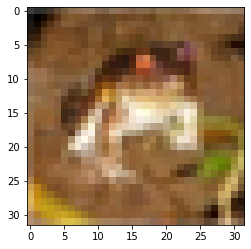

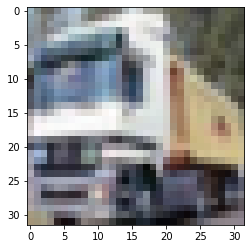

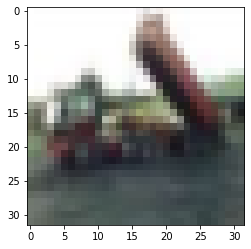

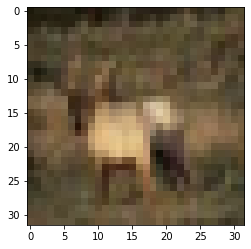

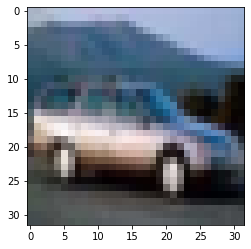

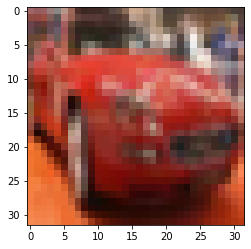

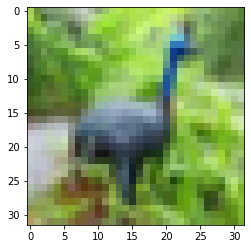

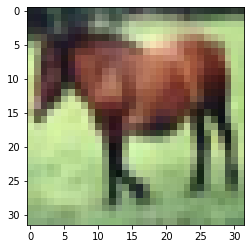

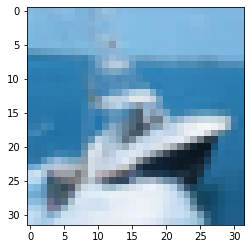

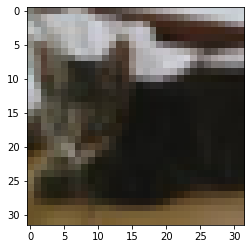

In [ ]:
# example of loading the mnist dataset

# summarize loaded dataset
print('Train: X=%s, y=%s' % (XTrain.shape, YTrain.shape))
print('Test: X=%s, y=%s' % (XTest.shape, YTest.shape))
# plot first few images
for i in range(10):
    plt.imshow(XTrain[i].reshape(32,32,3))
    plt.show()
plt.show()

In [ ]:
# Build a Model 

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Dropout(0.25))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D((2,2)))


model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)        

In [ ]:
def preprocess_data(X,Y):
    X = X.reshape((-1,32,32,3))
    X = X/255.0
    Y = to_categorical(Y)
    return X,Y

XTrain,YTrain = preprocess_data(XTrain,YTrain)
print(XTrain.shape,YTrain.shape)

XTest,YTest = preprocess_data(XTest,YTest)
print(XTest.shape,YTest.shape)

(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)


In [6]:
# Model Compilation
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
hist = model.fit(XTrain,YTrain,epochs=20,validation_split=0.1,batch_size=128)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 98s 2ms/step - loss: 1.6542 - accuracy: 0.3869 - val_loss: 1.4398 - val_accuracy: 0.4874
Epoch 2/20
45000/45000 [==============================] - 97s 2ms/step - loss: 1.2759 - accuracy: 0.5426 - val_loss: 1.2296 - val_accuracy: 0.5752
Epoch 3/20
45000/45000 [==============================] - 97s 2ms/step - loss: 1.1008 - accuracy: 0.6073 - val_loss: 1.1441 - val_accuracy: 0.6066
Epoch 4/20
45000/45000 [==============================] - 97s 2ms/step - loss: 0.9788 - accuracy: 0.6550 - val_loss: 1.0288 - val_accuracy: 0.6434
Epoch 5/20
45000/45000 [==============================] - 97s 2ms/step - loss: 0.8777 - accuracy: 0.6912 - val_loss: 0.9512 - val_accuracy: 0.6720
Epoch 6/20
45000/45000 [==============================] - 97s 2ms/step - loss: 0.7962 - accuracy: 0.7189 - val_loss: 0.9922 - val_accuracy: 0.6540
Epoch 7/20
45000/45000 [==============================] - 97s 2ms/ste

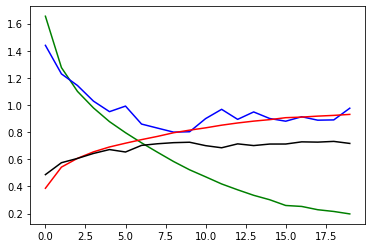

In [7]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()

In [8]:
model.evaluate(XTest,YTest)

10000/10000 [==============================] - 6s 563us/step


[1.0210888956069946, 0.7120000123977661]